<a href="https://colab.research.google.com/github/ahaffne2/64061_ahaffne2/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)


In [86]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 150


(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words = max_features)



In [87]:
from keras.utils import pad_sequences

In [88]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)




In [89]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(100, 8, input_length=maxlen))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 150, 8)            800       
                                                                 
 flatten_12 (Flatten)        (None, 1200)              0         
                                                                 
 dense_21 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6645 - acc: 0.6082 - val_loss: 0.6065 - val_acc: 0.6850
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5746 - acc: 0.7056 - val_loss: 0.5639 - val_acc: 0.7040
Epoch 3/10
625/625 [==============================]

Compiling the model

Validating your approach
Setting aside a validation set

In [90]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training your model

In [91]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=100,
                    validation_data=(x_val, y_val))



Epoch 1/20
150/150 [==============================] - 1s 5ms/step - loss: 0.5278 - acc: 0.7363 - val_loss: 0.5051 - val_acc: 0.7537
Epoch 2/20
150/150 [==============================] - 1s 6ms/step - loss: 0.5225 - acc: 0.7406 - val_loss: 0.5081 - val_acc: 0.7496
Epoch 3/20
150/150 [==============================] - 1s 6ms/step - loss: 0.5177 - acc: 0.7450 - val_loss: 0.5134 - val_acc: 0.7464
Epoch 4/20
150/150 [==============================] - 1s 5ms/step - loss: 0.5138 - acc: 0.7481 - val_loss: 0.5149 - val_acc: 0.7443
Epoch 5/20
150/150 [==============================] - 1s 6ms/step - loss: 0.5099 - acc: 0.7504 - val_loss: 0.5186 - val_acc: 0.7392
Epoch 6/20
150/150 [==============================] - 1s 6ms/step - loss: 0.5068 - acc: 0.7543 - val_loss: 0.5212 - val_acc: 0.7384
Epoch 7/20
150/150 [==============================] - 1s 6ms/step - loss: 0.5038 - acc: 0.7532 - val_loss: 0.5240 - val_acc: 0.7361
Epoch 8/20
150/150 [==============================] - 1s 5ms/step - loss: 0.

In [92]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [93]:
model.evaluate(x_val,y_val)

313/313 [==============================] - 1s 3ms/step - loss: 0.5598 - acc: 0.7148


[0.5598486065864563, 0.7148000001907349]

Plotting the training and validation loss

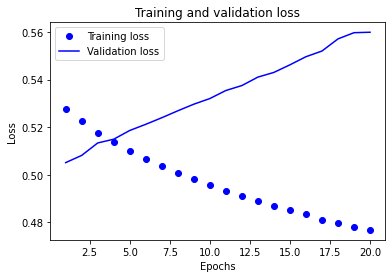

In [94]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the training and validation accuracy

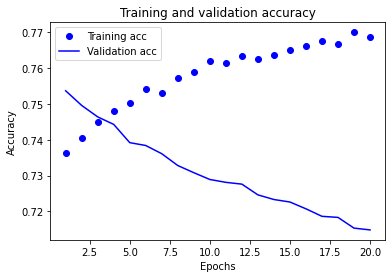

In [95]:
plt.clf
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [82]:
model.evaluate(x_val,y_val)

313/313 [==============================] - 1s 4ms/step - loss: 0.5619 - acc: 0.7125


[0.5618554949760437, 0.7124999761581421]

Pretrained


In [4]:
import tensorflow as tf
dataset = tf.keras.utils.get_file(
    fname="aclImdb.tar.gz", 
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
    extract=True,)

In [6]:
!unzip /content/aclImdb.zip
!unzip /content/glove.6B.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/aclImdb/train/pos/._7757_9.txt  
  inflating: aclImdb/train/pos/7758_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7758_7.txt  
  inflating: aclImdb/train/pos/7759_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7759_10.txt  
  inflating: aclImdb/train/pos/775_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._775_7.txt  
  inflating: aclImdb/train/pos/7760_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7760_10.txt  
  inflating: aclImdb/train/pos/7761_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7761_10.txt  
  inflating: aclImdb/train/pos/7762_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7762_8.txt  
  inflating: aclImdb/train/pos/7763_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7763_8.txt  
  inflating: aclImdb/train/pos/7764_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7764_9.txt  
  inflating: aclImdb/train/pos/7765_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7765_7.txt  

In [60]:
import os

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [96]:
from keras.preprocessing.text import Tokenizer

from keras.utils import pad_sequences
import numpy as np

maxlen = 150
training_samples = 100
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]




Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [5]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2022-11-19 22:38:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-11-19 22:38:27--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-19 22:38:27--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [33]:
!unzip /content/glove.6B.zip.1

Archive:  /content/glove.6B.zip.1
  inflating: glove.6B.50d.txt        
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [62]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [97]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector



In [98]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_13 (Flatten)        (None, 15000)             0         
                                                                 
 dense_22 (Dense)            (None, 32)                480032    
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,480,065
Trainable params: 1,480,065
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [100]:

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')


Epoch 1/10
4/4 [==============================] - 1s 256ms/step - loss: 2.7302 - acc: 0.4900 - val_loss: 1.4682 - val_acc: 0.4992
Epoch 2/10
4/4 [==============================] - 1s 206ms/step - loss: 0.9258 - acc: 0.5500 - val_loss: 0.7344 - val_acc: 0.4999
Epoch 3/10
4/4 [==============================] - 1s 198ms/step - loss: 0.4673 - acc: 0.7000 - val_loss: 0.9285 - val_acc: 0.5003
Epoch 4/10
4/4 [==============================] - 1s 217ms/step - loss: 0.4852 - acc: 0.6800 - val_loss: 0.9480 - val_acc: 0.5014
Epoch 5/10
4/4 [==============================] - 1s 217ms/step - loss: 0.5814 - acc: 0.7000 - val_loss: 1.1460 - val_acc: 0.5013
Epoch 6/10
4/4 [==============================] - 1s 197ms/step - loss: 0.1941 - acc: 0.9600 - val_loss: 0.7211 - val_acc: 0.5312
Epoch 7/10
4/4 [==============================] - 1s 205ms/step - loss: 0.0762 - acc: 1.0000 - val_loss: 0.7626 - val_acc: 0.5293
Epoch 8/10
4/4 [==============================] - 1s 216ms/step - loss: 0.0467 - acc: 1.00

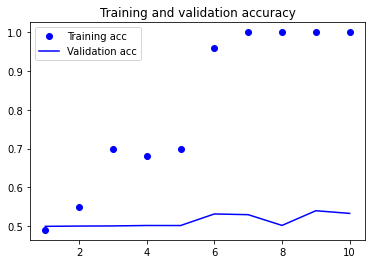

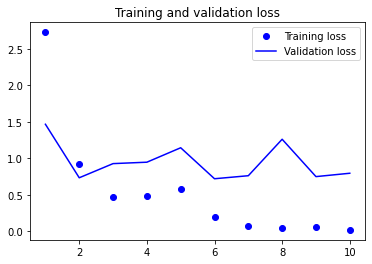

In [101]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [102]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_14 (Flatten)        (None, 15000)             0         
                                                                 
 dense_24 (Dense)            (None, 32)                480032    
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,480,065
Trainable params: 1,480,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 1s 256ms/step - loss: 0.7056 - acc: 0.5500 - val_loss: 0.6937 - val_acc: 0.4994
Epoch 2/10
4/4 [=============================

In [103]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [104]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7921 - acc: 0.5378


[0.7920708656311035, 0.5378000140190125]